### The Sparks Foundation Internship

##### Data Science and Business Analyst

##### Task 1: - Prediction using Supervised ML

#### Author : SHASHWAT SHARMA

### **SIMPLE LINEAR REGRESSION**
In this regression task we will predict the percentage of marks that a student is expected to score based upon the number of hours they studied. This is a simple linear regression task as it involves just two variables.

### **Importing and Understanding Data**

In [123]:
# Supress warnings

import warnings
warnings.filterwarnings("ignore")

In [124]:
# Import important libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [125]:
# Reading data from remote link
data = pd.read_csv("https://raw.githubusercontent.com/AdiPersonalWorks/Random/master/student_scores%20-%20student_scores.csv")
data.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [126]:
# Inspection-shape of the data

data.shape

(25, 2)

In [127]:
# Checking dtypes

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
Hours     25 non-null float64
Scores    25 non-null int64
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [128]:
# Check statistical parameter of the data

data.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


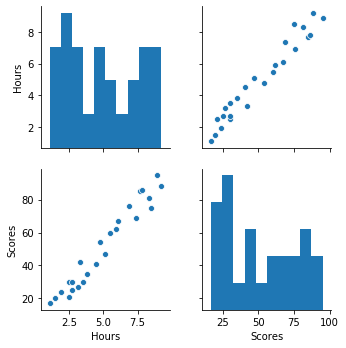

In [129]:
# pairplot for numerical features

sns.pairplot(data=data, vars=['Hours', 'Scores'])
plt.show()

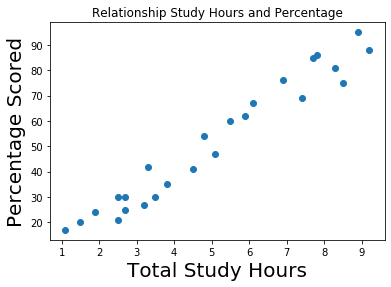

In [130]:
# scatter plot to observe relationship between 'Hours' and 'Scores'

plt.scatter(x='Hours', y='Scores', data=data)
plt.xlabel('Total Study Hours', fontsize=20)
plt.ylabel('Percentage Scored', fontsize=20)
plt.title('Relationship Study Hours and Percentage')
plt.show()

From the graph above, we can clearly see that there is a positive linear relation between the number of hours studied and percentage of score.

From the above scatter plot it is also clear that there is not any outlier, but we will check the boxplot too.

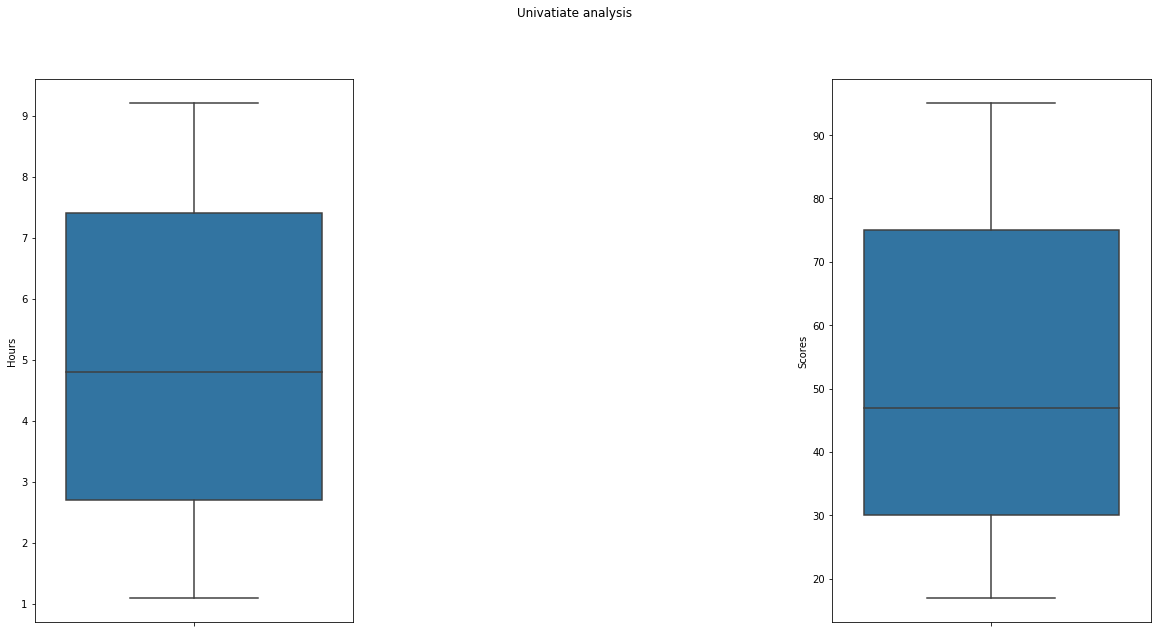

In [131]:
# BOXPLOT
# Univatiate analysis along with Boxplot to check outliers

plt.figure(figsize=(20,10))
plt.suptitle("Univatiate analysis")
plt.subplot(1,2,1)
plt.subplots_adjust(left=0.125, bottom=None, right=None, top=None, wspace=1.5, hspace=1.5)
sns.boxplot(y=data['Hours'])

plt.subplot(1,2,2)
plt.subplots_adjust(left=0.125, bottom=None, right=None, top=None, wspace=1.5, hspace=1.5)
sns.boxplot(y=data['Scores'])
plt.show()

There does not seem to be any outlier in the data.

### **Preparing the data**

##### Dividing the data into Training and Test sets

In [132]:
# Divide the data into "attributes" (inputs) and "labels" (outputs).

X=data['Hours']
y=data['Scores']

In [133]:
# Split this data into training and test sets. We'll do this by using Scikit-Learn's built-in train_test_split() method:

# Let's divide the data and store test data in 'X_test' and 'y_test' and training data in 'X_train' and 'y_train'.

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, train_size=0.7, test_size=0.3, random_state=100)

### **Training the Algorithm**
We have split our data into training and testing sets, and now is finally the time to train our algorithm. 

In [134]:
import statsmodels.api as sm
# Add a constant
X_train_sk=sm.add_constant(X_train)

# Create a fitted model
lr = sm.OLS(y_train, X_train_sk).fit()

In [135]:
# Check the parameters obtained

lr.params

const    1.495142
Hours    9.871714
dtype: float64

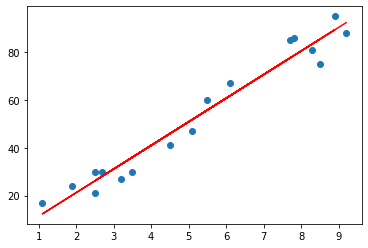

In [136]:
# Let's visualise the data with a scatter plot and the fitted regression line
plt.scatter(X_train_sk.iloc[:, 1], y_train)
plt.plot(X_train_sk.iloc[:, 1], 1.495142 + 9.871714*X_train_sk.iloc[:, 1], 'r')
plt.show()

Here we can visualise linear relation ship between predictor variable and target variable

In [137]:
# Summary of the linear model

print(lr.summary())

                            OLS Regression Results                            
Dep. Variable:                 Scores   R-squared:                       0.957
Model:                            OLS   Adj. R-squared:                  0.954
Method:                 Least Squares   F-statistic:                     334.4
Date:                Tue, 20 Apr 2021   Prob (F-statistic):           1.15e-11
Time:                        16:45:29   Log-Likelihood:                -53.270
No. Observations:                  17   AIC:                             110.5
Df Residuals:                      15   BIC:                             112.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.4951      3.169      0.472      0.6

R_square value of this model is 0.957, which is a very good score.

## Making Prediction

In [138]:
# Check test set
X_test

9     2.7
22    3.8
13    3.3
11    5.9
5     1.5
19    7.4
23    6.9
21    4.8
Name: Hours, dtype: float64

In [139]:
# Let's add constant to X_test
X_test_sm = sm.add_constant(X_test)

In [140]:
# Let's predict y values corresponding to X_test_sm

y_pred = lr.predict(X_test_sm)

In [141]:
# Observe the predicted value
y_pred

9     28.148771
22    39.007657
13    34.071800
11    59.738257
5     16.302714
19    74.545829
23    69.609972
21    48.879371
dtype: float64

In [142]:
X_test_sm.head()

,const,Hours
9,1.0,2.7
22,1.0,3.8
13,1.0,3.3
11,1.0,5.9
5,1.0,1.5


In [143]:
X_test_sm.shape

(8, 2)

In [144]:
# Comparing Actual vs Predicted
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})  
df 

,Actual,Predicted
9,25,28.148771
22,35,39.007657
13,42,34.071800
11,62,59.738257
5,20,16.302714
19,69,74.545829
23,76,69.609972
21,54,48.879371


## Evaluating the model

The final step is to evaluate the performance of algorithm. This step is particularly important to compare how well different algorithms perform on a particular dataset. For simplicity here, we have chosen the mean square error. There are many such metrics.

In [145]:
# calculate the R-squared score on the test set

from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.9309458862687439

In [146]:
from sklearn import metrics  
print('Mean Absolute Error:', 
      metrics.mean_absolute_error(y_test, y_pred)) 

Mean Absolute Error: 4.762517892332272


Text(0, 0.5, 'y_pred')

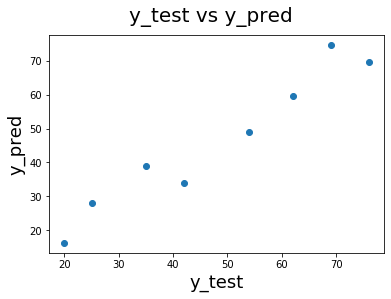

In [147]:
# Let's plot the graph to visualise actual vs predicted value

fig = plt.figure()
plt.scatter(y_test, y_pred)
fig.suptitle('y_test vs y_pred', fontsize = 20)
plt.xlabel('y_test', fontsize = 18)
plt.ylabel('y_pred', fontsize = 18)

The value of the test data seems to be increasing linearly.

OBSERVATION: -
The more number of hours a student studies the better he or she scores.